In [82]:
import os
import opsimsummary as oss
import healpy as hp
from opsimsummary import SynOpSim
import numpy as np
import matplotlib.pyplot as plt
import astropy.coordinates as coord
import astropy.units as u
import pickle

## Notes

First 3 years of survey: t_start = 60220, t_end = 61325 (from Catarina) <br>
There is no column with (ra, dec) of the source, so save this as the mean of fieldRA and fieldDec.

## LSST zero points

In [19]:
LSST_g = {'magnitude_zero_point': 28.30,
          'average_seeing': 0.77,
          'sky_brightness': 22.26,
          'limiting_magnitude': 25.0}

LSST_r = {'magnitude_zero_point': 28.13,
          'average_seeing': 0.73,
          'sky_brightness': 21.2,
          'limiting_magnitude': 24.7}

LSST_i = {'magnitude_zero_point': 27.79,
          'average_seeing': 0.71,
          'sky_brightness': 20.48,
          'limiting_magnitude': 24.0}

LSST_z = {'magnitude_zero_point': 27.40,
          'average_seeing': 0.69,
          'sky_brightness': 19.6,
          'limiting_magnitude': 23.3}

LSST_y = {'magnitude_zero_point': 26.58,
          'average_seeing': 0.68,
          'sky_brightness': 18.61,
          'limiting_magnitude': 22.1}

def zeropoint(band):
    if band == 'g':
        obs_dict = LSST_g
    elif band == 'r':
        obs_dict = LSST_r
    elif band == 'i':
        obs_dict = LSST_i
    elif band == 'z':
        obs_dict = LSST_z
    elif band == 'y':
        obs_dict = LSST_y
    else:
        raise ValueError("band %s not supported! Choose 'g', 'r', 'i', 'z' or 'y' for LSST." % band)

    return obs_dict['magnitude_zero_point']


def flux(mag, zero_point):
    return 10**((zero_point - mag)/2.5)

## Sky Pointings

Sample points with -90 < DEC < 40

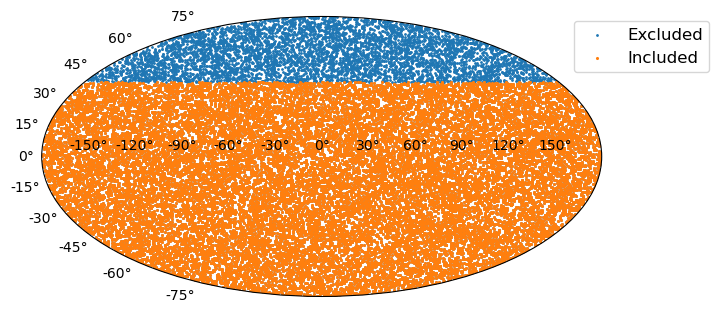

In [225]:
# Input coordinates

def radians(degrees):
    return degrees / 180 * np.pi

N = 30000

# Sample random points on a sphere
ra_points = np.random.uniform(low=-180, high=180, size=N)
dec_points = np.arcsin(2 * np.random.uniform(size=N) - 1) / np.pi * 180

fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(221, projection="mollweide")
im1 = ax1.scatter(radians(ra_points), radians(dec_points), s=1, label="Excluded")

dec_selection = (dec_points > -90) & (dec_points < 40)
ra_points = ra_points[dec_selection]
dec_points = dec_points[dec_selection]
im1 = ax1.scatter(radians(ra_points), radians(dec_points), s=1.5, label="Included")
plt.legend(loc=(0.95, 0.8), fontsize=12)

ra_points += 180

## OpSim Summary

In [2]:
myopsimv3 = '../data/OpSim_databases/draft2_rw0.9_uz_v2.99_10yrs.db'

In [3]:
synopsim = SynOpSim.fromOpSimDB(myopsimv3, opsimversion='fbsv2', usePointingTree=True, use_proposal_table=False,
                               subset='unique_all')

 reading from database sqlite:///../data/OpSim_databases/draft2_rw0.9_uz_v2.99_10yrs.db
We have filterNull set to False
checking that summary table read in

Reading in raw tables successful
replacing names works
dropping duplicates works
dithered column names exists 
Changing units for fbsv2 from degrees


In [226]:
gen = synopsim.pointingsEnclosing(ra_points, dec_points, circRadius=0., pointingRadius=1.75, 
                                  usePointingTree=True)


In [227]:
# Loop through all pointings and save the ones that are in the LSST footprint

opsim_ra_list, opsim_dec_list = [], []

for p in range(len(ra_points)):
    
    obs = next(gen)
    
    opsim_ra = np.mean(obs['fieldRA'])
    opsim_dec = np.mean(obs['fieldDec'])

    if np.isnan(opsim_ra) or np.isnan(opsim_dec):
        continue
    
    opsim_ra_list.append(opsim_ra)
    opsim_dec_list.append(opsim_dec)
    
opsim_ra_list = np.array(opsim_ra_list)
opsim_dec_list = np.array(opsim_dec_list)
opsim_ra_list -= 180

check using ptree True


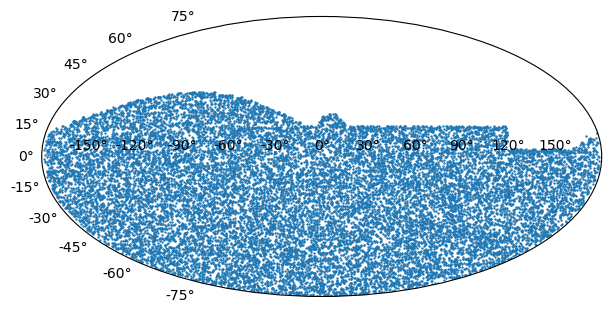

In [228]:
fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(221, projection="mollweide")
im1 = ax1.scatter(radians(opsim_ra_list), radians(opsim_dec_list), s=0.5)

In [229]:
print(len(opsim_dec_list))

20335


In [231]:
print(20335 / 30000)
print(1/0.677833333)

0.6778333333333333
1.4752889114705132


In [130]:
next(gen)

check using ptree True


,fieldRA,fieldDec,expMJD,flush_by_mjd,visitExposureTime,filter,rotSkyPos,rotSkyPos_desired,numExposures,airmass,...,moonRA,moonDec,moonDistance,solarElong,moonPhase,cummTelAz,scripted_id,_ra,_dec,intindex
obsHistID,,,,,,,,,,,,,,,,,,,,,


In [252]:
test = next(gen)

In [7]:
print(test.keys())

Index(['fieldRA', 'fieldDec', 'expMJD', 'flush_by_mjd', 'visitExposureTime',
       'filter', 'rotSkyPos', 'rotSkyPos_desired', 'numExposures', 'airmass',
       'seeingFwhm500', 'FWHMeff', 'seeingFwhmGeom', 'filtSkyBrightness',
       'night', 'slewTime', 'visitTime', 'slewDistance', 'fiveSigmaDepth',
       'altitude', 'azimuth', 'paraAngle', 'cloud', 'moonAlt', 'sunAlt',
       'note', 'fieldId', 'proposalId', 'block_id', 'observationStartLST',
       'rotTelPos', 'rotTelPos_backup', 'moonAz', 'sunAz', 'sunRA', 'sunDec',
       'moonRA', 'moonDec', 'moonDistance', 'solarElong', 'moonPhase',
       'cummTelAz', 'scripted_id', '_ra', '_dec', 'intindex'],
      dtype='object')


In [253]:
obs = 3

# sky_brightness = test.iloc[obs]['filtSkyBrightness']
lim_mag = test.iloc[obs]['fiveSigmaDepth']
band = test.iloc[obs]['filter']
zero_point = zeropoint(band)
lim_flux = flux(lim_mag, zero_point)
flux_error = lim_flux / 5

# flux = ... (from model, zp = zero_point)
# new_flux = np.random.normal(loc=flux, scale=abs(flux_error))
# mag_error = abs(-2.5 * flux_skynoise / (new_flux_ps * np.log(10)))

print("lim_mag = ", lim_mag)
print("band = ", band)
print("zero_point = ", zero_point)
print("lim_flux = ", lim_flux)

# Quantities to save per observation: expMJD, filter, seeingFwhmGeom, fiveSigmaDepth, filtSkyBrightness (for images), 

lim_mag =  21.846103012408726
band =  y
zero_point =  26.58
lim_flux =  78.26341513560334


In [179]:
print(type(gen))

<class 'generator'>


## Funtions for pipeline

In [242]:
def create_sky_pointings(N, dec_low=-90, dec_high=40):
    """
    Creates random points on a sphere (with limited declination).
    Acception fraction of points is around 2/3, so sample ~1.6 times as many points.
    """
    
    sample_number = int(N * 1.6)
    print(sample_number)
    ra_points = np.random.uniform(low=0, high=360, size=sample_number)
    dec_points = np.arcsin(2 * np.random.uniform(size=sample_number) - 1) / np.pi * 180

    dec_selection = (dec_points > dec_low) & (dec_points < dec_high)
    ra_points = ra_points[dec_selection]
    dec_points = dec_points[dec_selection]

    return ra_points, dec_points

In [184]:
def generate_opsim_summary(ra_pointings, dec_pointings):
    myopsimv3 = '../data/OpSim_databases/draft2_rw0.9_uz_v2.99_10yrs.db'
    
    #synopsim = SynOpSim.fromOpSimDB(myopsimv3, opsimversion='fbsv2', usePointingTree=True, use_proposal_table=False,
    #                           subset='unique_all')
    
    gen = synopsim.pointingsEnclosing(ra_pointings, dec_pointings, circRadius=0., pointingRadius=1.75, 
                                  usePointingTree=True)
    return gen

In [276]:
def opsim_observation(gen):
    
    while True:
    
        obs = next(gen)
        opsim_ra = np.mean(obs['fieldRA'])
        opsim_dec = np.mean(obs['fieldDec'])

        print(opsim_ra, opsim_dec)

        if np.isnan(opsim_ra) or np.isnan(opsim_dec):
            print("Not accepted")
            continue
                
        print("Accepted!")
        obs = obs.sort_values(by=['expMJD'])
        
        opsim_times = obs['expMJD']
        opsim_filters = obs['filter']
        opsim_psf = obs['seeingFwhmGeom']
        opsim_lim_mag = obs['fiveSigmaDepth']
        opsim_sky_brightness = obs['filtSkyBrightness']
        break

    print(" ")
    return opsim_ra, opsim_dec, opsim_times, opsim_filters, opsim_psf, opsim_lim_mag, opsim_sky_brightness
   

In [263]:
def select_operation_years(times, filters, psf, lim_mag, sky_brightness, mjd_cutoff=61325):
    
    indices = times < mjd_cutoff
    
    return times[indices], filters[indices], psf[indices], lim_mag[indices], sky_brightness[indices]
    

In [277]:
ra_pointings, dec_pointings = create_sky_pointings(N=3000)
gen = generate_opsim_summary(ra_pointings, dec_pointings)
print(len(ra_pointings))
print(dec_pointings)

4800
3917
[ 2.75568767 29.2794942   6.99086864 ... 29.60173591 -7.71858702
 16.03629247]


In [288]:
ra, dec, times, filters, psf, lim_mag, sky_brightness = opsim_observation(gen)

294.8351814021812 -4.7051130690068685
Accepted!
 


In [289]:
print(len(times), len(filters), len(lim_mag))
print(times)

307 307 307
obsHistID
12393      60234.065964
12443      60234.088333
106599     60378.403548
106612     60378.406645
142962     60423.350127
               ...     
2080036    63855.986864
2080055    63855.996780
2080057    63855.997677
2082123    63859.009342
2082173    63859.033292
Name: expMJD, Length: 307, dtype: float64


In [290]:
times, filters, psf, lim_mag, sky_brightness = select_operation_years(times, filters, psf, lim_mag, sky_brightness)
print(len(times), len(filters), len(lim_mag))
print(times)

103 103 103
obsHistID
12393     60234.065964
12443     60234.088333
106599    60378.403548
106612    60378.406645
142962    60423.350127
              ...     
602850    61271.154513
604026    61273.044031
604076    61273.068256
609666    61294.084124
609716    61294.106254
Name: expMJD, Length: 103, dtype: float64


In [269]:
print(max(times))

61145.13023967346


In [ ]:
days = test['expMJD']
filters = test['filter']
ra = test['_ra']
print((days[days < 61325]))
print(filters[days < 61325])

In [ ]:
print(ra / np.pi * 180)

In [ ]:
print(len(np.floor(days)))

In [ ]:
print(len(np.unique(np.floor(days))))